In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import KBinsDiscretizer
from scipy import stats
import scipy.stats as stats
from scipy.stats import spearmanr

# Cargar el archivo CSV
df = pd.read_csv('Melbourne_housing_FULL.csv')




In [163]:
# Número total de filas en el DataFrame original
total_rows = df.shape[0]

# Número de filas con valores nulos en la columna 'Price'
null_rows = df['Price'].isnull().sum()

# Calcular el porcentaje de valores nulos
percentage_null = (null_rows / total_rows) * 100

# Mostrar los resultados
print(f"Número total de filas: {total_rows}")
print(f"Número de filas con valores nulos en 'Price': {null_rows}")
print(f"Porcentaje de valores nulos en 'Price': {percentage_null:.2f}%")


Número total de filas: 34857
Número de filas con valores nulos en 'Price': 7610
Porcentaje de valores nulos en 'Price': 21.83%


In [164]:
# Eliminar filas con valores nulos en la columna 'Price'
df = df.dropna(subset=['Price']).copy()  # Hacer una copia explícita

# Convertir la columna 'Price' a entero usando .loc[]
df.loc[:, 'Price'] = df['Price'].astype(int)

# Mostrar las primeras filas del DataFrame limpio
print(df.head())

       Suburb           Address  Rooms Type      Price Method SellerG  \
1  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
4  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
5  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
6  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
5  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
6  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \

In [165]:
# Contar la frecuencia de cada tipo de propiedad
property_counts = df['Type'].value_counts()

# Calcular el porcentaje de cada tipo de propiedad
property_percentages = (property_counts / df.shape[0]) * 100

# Mostrar el tipo de propiedad más común y su porcentaje
most_common_property = property_counts.idxmax()
most_common_percentage = property_percentages.max()

print(f"El tipo de propiedad más común es: {most_common_property}")
print(f"Representa el {most_common_percentage:.2f}% de las propiedades.")


El tipo de propiedad más común es: h
Representa el 67.79% de las propiedades.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_193900\1215947939.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_counts.index, y=property_counts.values, palette='viridis')


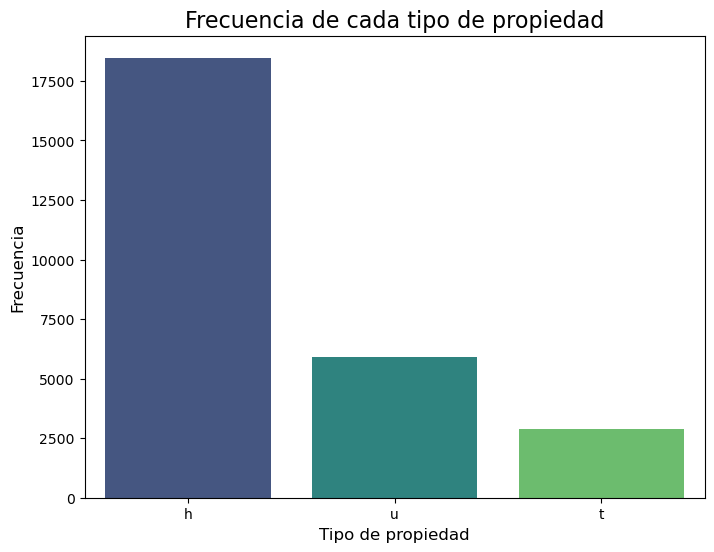

In [166]:
# Contar la frecuencia de cada tipo de propiedad y ordenarlo en orden descendente
property_counts = df['Type'].value_counts()

# Crear un gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, palette='viridis')

# Añadir etiquetas y título
plt.title('Frecuencia de cada tipo de propiedad', fontsize=16)
plt.xlabel('Tipo de propiedad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Mostrar el gráfico
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_193900\934845047.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Rooms', y='Price', data=avg_price_by_rooms, palette='magma')


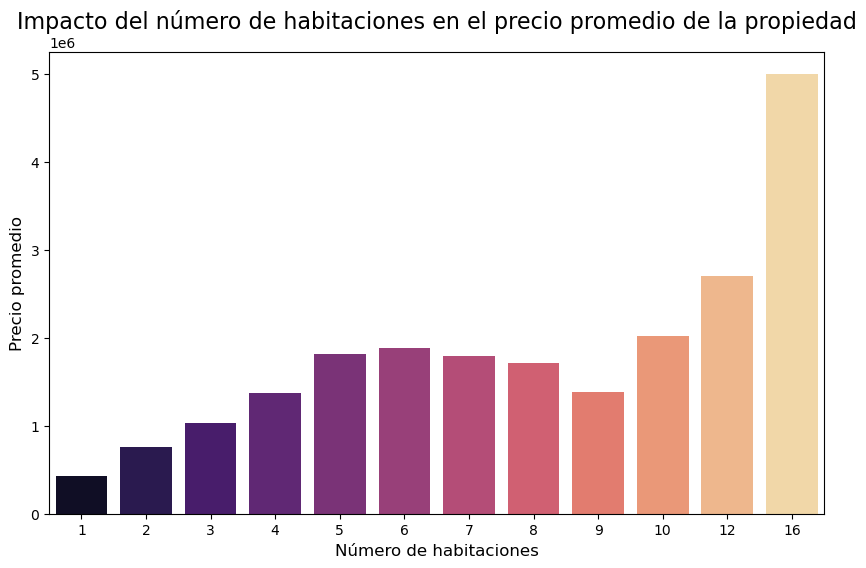

In [167]:
# Calcular el precio promedio por número de habitaciones
avg_price_by_rooms = df.groupby('Rooms')['Price'].mean().reset_index()

# Crear un gráfico de barras para mostrar la relación entre número de habitaciones y precio promedio
plt.figure(figsize=(10, 6))
sns.barplot(x='Rooms', y='Price', data=avg_price_by_rooms, palette='magma')

# Añadir etiquetas y título
plt.title('Impacto del número de habitaciones en el precio promedio de la propiedad', fontsize=16)
plt.xlabel('Número de habitaciones', fontsize=12)
plt.ylabel('Precio promedio', fontsize=12)

# Mostrar el gráfico
plt.show()


In [168]:
# Calcular el coeficiente de correlación de Spearman
spearman_corr, p_value = spearmanr(df['Rooms'], df['Price'].dropna())

# Mostrar los resultados
print(f'Coeficiente de correlación de Spearman: {spearman_corr:.4f}')
print(f'Valor p: {p_value:.4f}')


Coeficiente de correlación de Spearman: 0.5043
Valor p: 0.0000


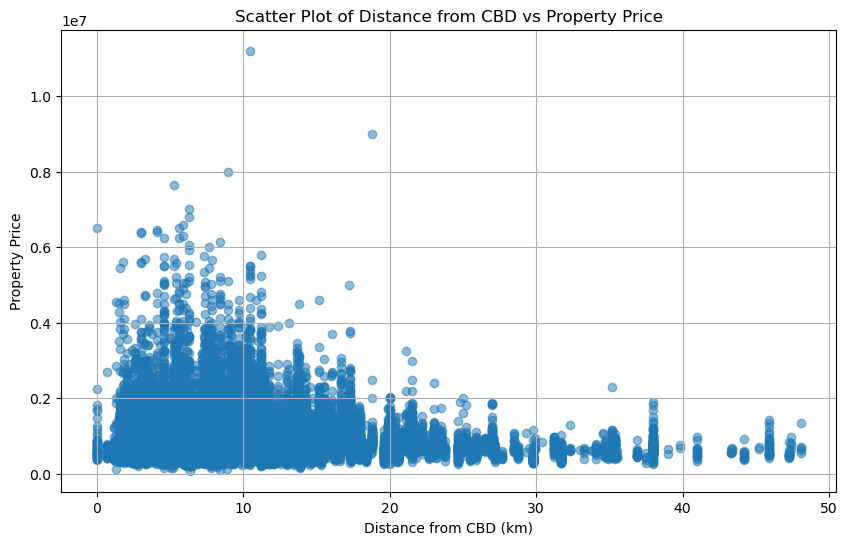

Pearson Correlation Coefficient: -0.2114


In [169]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Distance'], df['Price'], alpha=0.5)
plt.title('Scatter Plot of Distance from CBD vs Property Price')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price')
plt.grid()
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient = df['Distance'].corr(df['Price'])
print(f'Pearson Correlation Coefficient: {correlation_coefficient:.4f}')


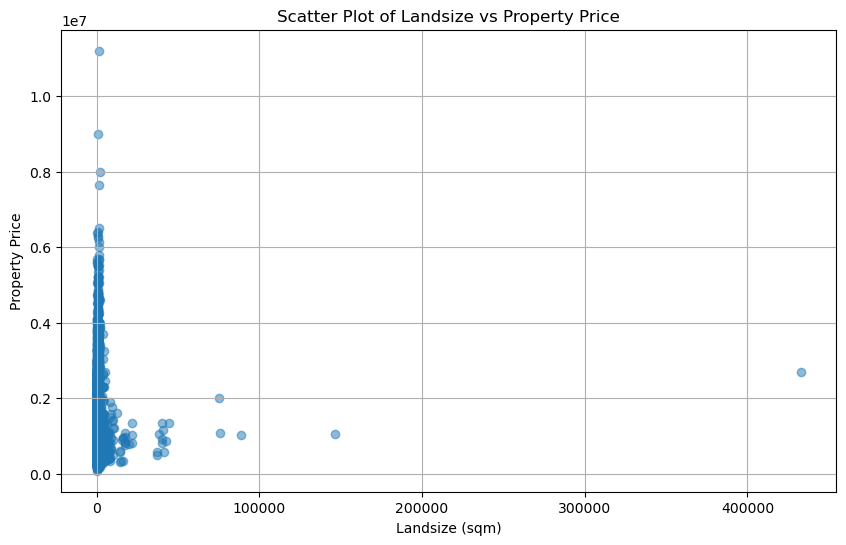

Pearson Correlation Coefficient (Landsize): 0.0327


In [170]:
# Create a scatter plot for Landsize vs Property Price
plt.figure(figsize=(10, 6))
plt.scatter(df['Landsize'], df['Price'], alpha=0.5)
plt.title('Scatter Plot of Landsize vs Property Price')
plt.xlabel('Landsize (sqm)')
plt.ylabel('Property Price')
plt.grid()
plt.show()

# Calculate the Pearson correlation coefficient
correlation_coefficient_landsize = df['Landsize'].corr(df['Price'])
print(f'Pearson Correlation Coefficient (Landsize): {correlation_coefficient_landsize:.4f}')


C:\Users\Usuario\AppData\Local\Temp\ipykernel_193900\3028081110.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_price_by_landsize = df.groupby('Landsize_category')['Price'].median().reset_index()


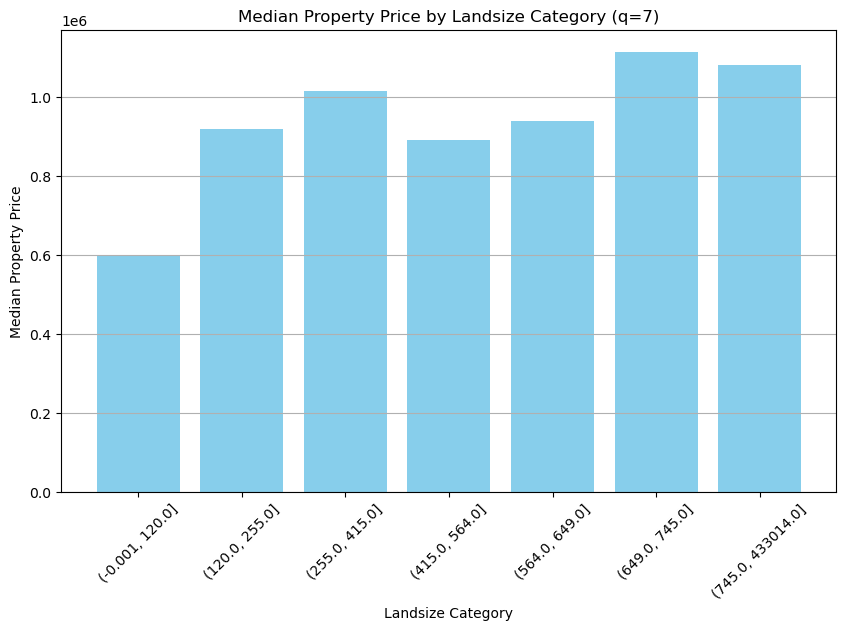

In [171]:
# Crear una nueva columna 'Landsize_category' basada en la discretización de 'Landsize'
df['Landsize_category'] = pd.qcut(df['Landsize'], q=7)

# Calcular la mediana del precio para cada categoría de tamaño de terreno
median_price_by_landsize = df.groupby('Landsize_category')['Price'].median().reset_index()

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(median_price_by_landsize['Landsize_category'].astype(str), median_price_by_landsize['Price'], color='skyblue')
plt.title('Median Property Price by Landsize Category (q=7)')
plt.xlabel('Landsize Category')
plt.ylabel('Median Property Price')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


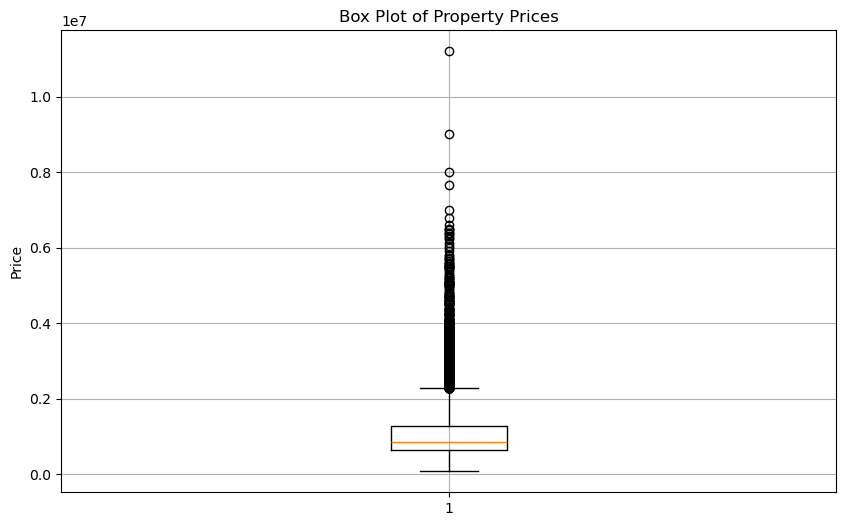

Percentage of properties identified as outliers: 4.69%


In [172]:
# Step 1: Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['Price'])
plt.title('Box Plot of Property Prices')
plt.ylabel('Price')
plt.grid()
plt.show()

# Step 2: Use Tukey's Method to identify outliers
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]

# Step 3: Create a new DataFrame without outliers
df_no_outliers = df[~df.index.isin(outliers.index)]

# Step 4: Calculate the percentage of properties identified as outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f'Percentage of properties identified as outliers: {percentage_outliers:.2f}%')


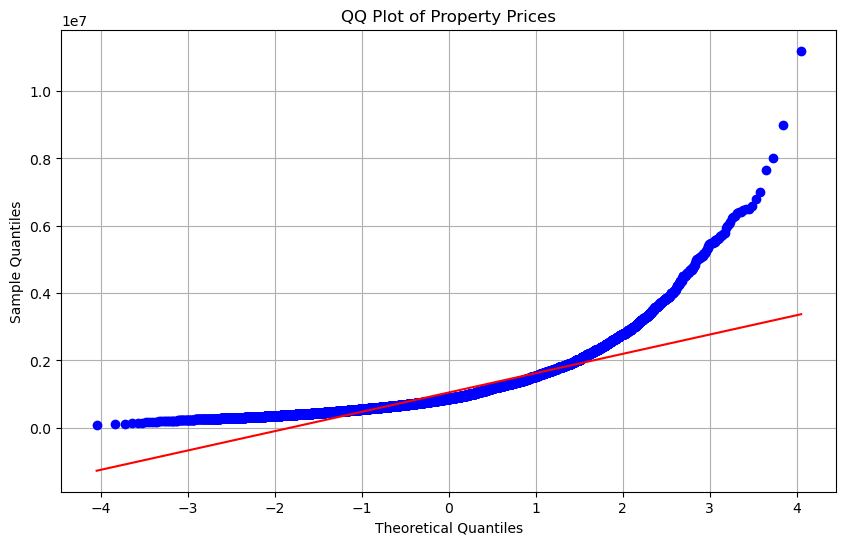

Skewness of property prices: 2.5890
Kurtosis of property prices: 13.0972


In [173]:
# Step 1: Create a QQ plot
plt.figure(figsize=(10, 6))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

# Step 2: Calculate skewness
skewness = df['Price'].skew()

# Step 3: Calculate kurtosis
kurtosis = df['Price'].kurtosis()

print(f'Skewness of property prices: {skewness:.4f}')
print(f'Kurtosis of property prices: {kurtosis:.4f}')


In [174]:
# Realizar el test de Kolmogorov-Smirnov
statistic, p_value = stats.kstest(df['Price'], 'norm', args=(df['Price'].mean(), df['Price'].std()))

print(f"Estadístico de prueba: {statistic:.4f}")
print(f"Valor p: {p_value:.4f}")

# Interpretar el valor p
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Se rechaza la hipótesis nula: la distribución es significativamente diferente de una normal.")
else:
    print("No se rechaza la hipótesis nula: la distribución no es significativamente diferente de una normal.")


Estadístico de prueba: 0.1375
Valor p: 0.0000
Se rechaza la hipótesis nula: la distribución es significativamente diferente de una normal.


C:\Users\Usuario\AppData\Local\Temp\ipykernel_193900\3066648475.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Price', palette='Set2')


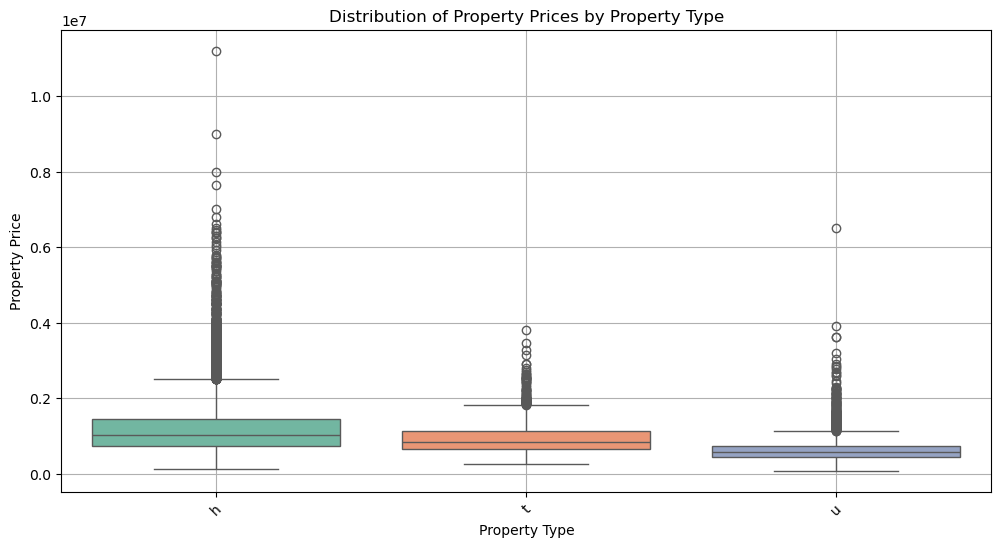

In [175]:
# Create a box plot for property prices by property type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Type', y='Price', palette='Set2')
plt.title('Distribution of Property Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid()
plt.show()


In [176]:
# Grouping by region and calculating median price
median_prices = df.groupby('Regionname')['Price'].median().reset_index()

# Identifying the region with the highest and lowest median prices
highest_median = median_prices.loc[median_prices['Price'].idxmax()]
lowest_median = median_prices.loc[median_prices['Price'].idxmin()]

highest_region = highest_median['Regionname']
highest_price = highest_median['Price']

lowest_region = lowest_median['Regionname']
lowest_price = lowest_median['Price']

highest_region, highest_price, lowest_region, lowest_price


('Southern Metropolitan', 1250000.0, 'Western Victoria', 412125.0)

In [177]:
# Step 1: Categorize the price variable into five distinct ranges
price_bins = [0, 200000, 400000, 600000, 800000, float('inf')]
price_labels = ['<200k', '200k-400k', '400k-600k', '600k-800k', '800k+']
df['Price_Category'] = pd.cut(df['Price'], bins=price_bins, labels=price_labels)

# Step 2: Create a contingency table
contingency_table = pd.crosstab(df['Regionname'], df['Price_Category'])

# Step 3: Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Calculate Cramér's V
n = contingency_table.sum().sum()  # total number of observations
phi2 = chi2 / n
r, k = contingency_table.shape
cramers_v = np.sqrt(phi2 / min(k-1, r-1))

# Results
significant = p < 0.05  # Assuming a significance level of 0.05
strength = ''
if cramers_v < 0.1:
    strength = 'weak'
elif 0.1 <= cramers_v < 0.3:
    strength = 'medium'
else:
    strength = 'strong'

# Output results
significant, cramers_v, strength


(True, 0.17294377346622933, 'medium')

In [178]:
# Convert 'Date' column to datetime with dayfirst=True
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Extract year from 'Date'
df['Year'] = df['Date'].dt.year

# Calculate median price by year
median_prices = df.groupby('Year')['Price'].median()

# Get the earliest and latest years
earliest_year = median_prices.index.min()
latest_year = median_prices.index.max()

# Get the median prices for those years
median_price_earliest = median_prices[earliest_year]
median_price_latest = median_prices[latest_year]

# Calculate percentage increase or decrease
percentage_change = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

print(f"The percentage change in median price from {earliest_year} to {latest_year} is {percentage_change:.2f}%")


The percentage change in median price from 2016 to 2018 is -5.48%


In [179]:

# Extract month from 'Date'
df['Month'] = df['Date'].dt.month

# Count the number of properties sold for each month
monthly_sales = df['Month'].value_counts().sort_index()

# Identify the month with the highest number of sales
max_sales_month = monthly_sales.idxmax()
max_sales_count = monthly_sales.max()

# Optionally, map the month number to the month name
month_names = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Get the name of the month with the highest sales
max_sales_month_name = month_names[max_sales_month]

print(f"The month with the highest number of houses sold is {max_sales_month_name} with {max_sales_count} sales.")


The month with the highest number of houses sold is November with 3408 sales.
